In [1]:
using SCYFI
using MAT
using LinearAlgebra
using Plots

## Load data

In [2]:
vars = matread("data/for_LE_multistable.mat")

A = vars["A"]
W₁ = vars["W1"]
W₂ = vars["W2"]
h₁ = vars["h1"]
h₂ = vars["h2"]

1×8 Matrix{Float32}:
 0.137927  1.3057  -0.000616583  0.956745  …  0.358909  0.0909019  0.327322

## Use SCYFI to calculate FP

In [3]:
res = find_cycles(diag(A), W₂[1,:,:], W₁[1,:,:], vec(h₂), vec(h₁),1,outer_loop_iterations=200,inner_loop_iterations=200)

cpu version
Number of initialisations in Pool: 868


2-element Vector{Vector{Array}}:
 [Array[Array[Float32[0.15676865, -0.7915906, -0.7744347, -0.43759105, -0.023306297, 0.33725938, 0.22510278, -0.75188595]], Array[Float32[-0.10199602, -0.58286464, -0.14182241, 0.074186146, 0.13945055, 0.4482448, 0.426363, -0.7856852]], Array[Float32[0.70086944, -0.5321374, -1.0069678, -0.780238, -0.53105927, -0.3204996, -0.41937274, 0.4988046]], Array[Float32[0.4934481, -0.644708, -0.937369, -0.6597408, -0.34366143, -0.0508602, -0.17542036, 0.022309132]], Array[Float32[-0.38926995, -0.37368277, 0.56505567, 0.6324795, 0.33519474, 0.5631033, 0.6423052, -0.8335683]]]]
 [Array[ComplexF32[-0.23615229f0 + 0.0f0im, 0.12465131f0 + 0.0f0im, 0.34596753f0 + 0.0f0im, 0.35287422f0 - 0.09421512f0im, 0.35287422f0 + 0.09421512f0im, 0.6052503f0 + 0.0f0im, 0.6898077f0 + 0.0f0im, 0.7122393f0 + 0.0f0im], ComplexF32[0.121520914f0 + 0.0f0im, 0.28525013f0 - 0.14817852f0im, 0.28525013f0 + 0.14817852f0im, 0.35116783f0 + 0.0f0im, 0.39846575f0 + 0.0f0im, 0.57787573f0 + 0.0f0im, 

The first entry in res is a list of fixed points and the second is the corresponding eigenvalues

## Visualize the fixed points in state space


In [4]:
fp_list = res[1][1]  # the first 1 selects the list of fp/cycles and the second 1 the order which i one for a FP
eigenvalue_list = res[2][1]

println("Number of Fixed points:",length(fp_list))

Number of Fixed points:5


Lets visualize the first two components in a 2D plot and colourcode them according to their stability


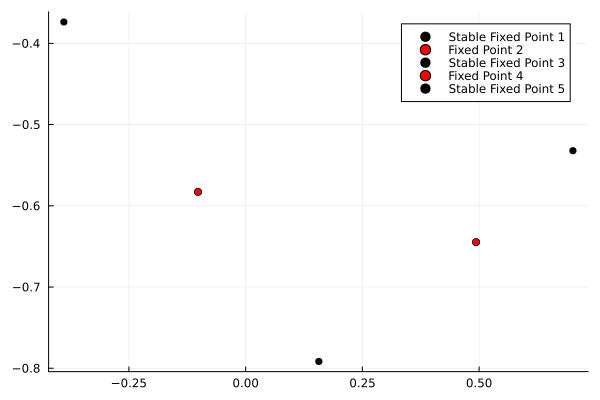

In [5]:
#initialize plot 
plo = plot()
for i in 1:length(fp_list)
    fp = fp_list[i][1]
    if all(abs.(eigenvalue_list[i]) .< 1)
        plot!(plo, [fp[1]], [fp[2]], seriestype = :scatter, label = "Stable Fixed Point $i",color = :black)
    else
        plot!(plo, [fp[1]], [fp[2]], seriestype = :scatter, label = "Fixed Point $i", color = :red)
        
    end
end


display(plo)

# Now check for several trials

In [8]:
FP_lists =[]
Eigenvalue_lists=[]
for i =1:size(W₁)[1]
    res= find_cycles(diag(A), W₂[i,:,:], W₁[i,:,:], vec(h₂), vec(h₁),1,outer_loop_iterations=200,inner_loop_iterations=200)
    push!(FP_lists,res[1])
    push!(Eigenvalue_lists,res[2])
end

cpu version
Number of initialisations in Pool: 865
cpu version
Number of initialisations in Pool: 861
cpu version
Number of initialisations in Pool: 874
cpu version
Number of initialisations in Pool: 870
cpu version
Number of initialisations in Pool: 864
cpu version
Number of initialisations in Pool: 865
cpu version
Number of initialisations in Pool: 864
cpu version
Number of initialisations in Pool: 866
cpu version
Number of initialisations in Pool: 863
cpu version
Number of initialisations in Pool: 860
cpu version
Number of initialisations in Pool: 859
cpu version
Number of initialisations in Pool: 866
cpu version
Number of initialisations in Pool: 864
cpu version
Number of initialisations in Pool: 867
cpu version
Number of initialisations in Pool: 866
cpu version
Number of initialisations in Pool: 869
cpu version
Number of initialisations in Pool: 866
cpu version
Number of initialisations in Pool: 858
cpu version
Number of initialisations in Pool: 862
cpu version
Number of initialis

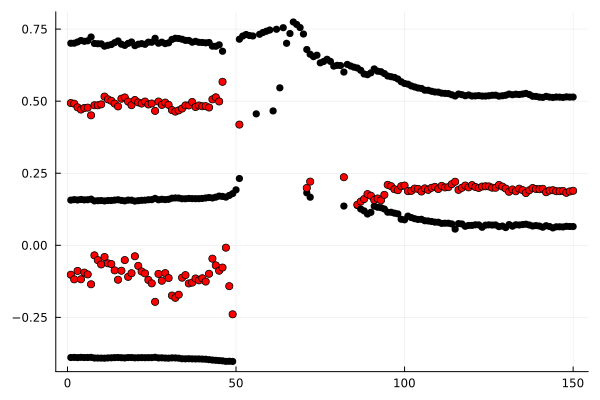

In [9]:
#initialize plot 
plo = plot(legend=false)
for k =1:length(FP_lists)
    
    for i in 1:length(FP_lists[k][1])
        fp = FP_lists[k][1][i][1]
        if all(abs.(Eigenvalue_lists[k][1][i]) .< 1)
            plot!(plo, [k], [fp[1]], seriestype = :scatter, label = "Stable Fixed Point $i",color = :black)
        else
            plot!(plo,[k], [fp[1]], seriestype = :scatter, label = "Fixed Point $i", color = :red)
            
        end
    end
end



display(plo)